In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
nz = 1001
zmax = 100.
z = np.linspace(0,zmax,num=nz)

chl = np.array(
         [1.0e-3,      0.01,         0.1,        1.0,    10.0])
col = ['deepskyblue','aquamarine','greenyellow','green','darkolivegreen']

nchl = np.shape(chl)[0]

In [3]:
# Paulson Simpson
k_ir = 2.86
k_vis = 0.0434
frac_ir = 0.58
frac_vis = 0.42

I_ps = frac_ir*np.exp(-k_ir*z) + frac_vis*np.exp(-k_vis*z)

In [4]:
# Manizza
frac_ir = 0.58
frac_vis = 0.42
frac_red = 0.5*frac_vis
frac_blue = frac_red

k_sw_ir = 2.86
k_sw_red = 0.255
k_sw_blue = 0.0232

chi_red = 0.037
chi_blue = 0.074

x_red = 0.629
x_blue = 0.674

k_red = k_sw_red + chi_red*chl**x_red
k_blue = k_sw_blue + chi_blue*chl**x_blue

I_man = np.ndarray(shape=(nchl,nz),dtype=float)
print('{:>10s} {:>10s} {:>10s} {:>10s} '.format('Chl','1./k_sw_ir','1./k_red','1./k_blue'))
for n,c in enumerate(chl) :
    print('{:10.4g} {:10.4f} {:>10.4f} {:>10.4f} '.format(c,1./k_sw_ir,1./k_red[n],1./k_blue[n]))
    
    I_man[n,:] = frac_ir*np.exp(-k_sw_ir*z) + frac_red*np.exp(-k_red[n]*z) + frac_blue*np.exp(-k_blue[n]*z)

       Chl 1./k_sw_ir   1./k_red  1./k_blue 
     0.001     0.3497     3.9142    41.8350 
      0.01     0.3497     3.8904    37.7064 
       0.1     0.3497     3.7923    25.7229 
         1     0.3497     3.4247    10.2881 
        10     0.3497     2.4244     2.6844 


In [5]:
# Ohlman
A1 = 0.571 + 0.025*np.log(0.149*chl)
A2 = 0.223 - 0.010*np.log(2.329*chl)
B1 = 0.015 + 0.176*np.sqrt(0.462*chl)
B2 = 0.688 + 0.060*np.log(0.125*chl)

I_ohl = np.ndarray(shape=(nchl,nz),dtype=float)
print('{:>10s} {:>10s} {:>10s} {:>10s} {:>10s} {:>10s} '.format('Chl','A1','A2','A1+A2', '1/B1', '1/B2'))
for n,c in enumerate(chl) :
    print('{:10.4g} {:10.4f} {:10.4f} {:10.4f} {:10.4f} {:10.4f} '.format(c,A1[n],A2[n],A1[n]+A2[n],1./B1[n],1./B2[n]))
    I_ohl[n,:] = A1[n]*np.exp(-B1[n]*z) + A2[n]*np.exp(-B2[n]*z)

       Chl         A1         A2      A1+A2       1/B1       1/B2 
     0.001     0.3507     0.2836     0.6343    53.2397     6.7219 
      0.01     0.4083     0.2606     0.6689    37.0881     3.4853 
       0.1     0.4658     0.2376     0.7034    18.9287     2.3525 
         1     0.5234     0.2145     0.7380     7.4279     1.7755 
        10     0.5810     0.1915     0.7725     2.5426     1.4257 


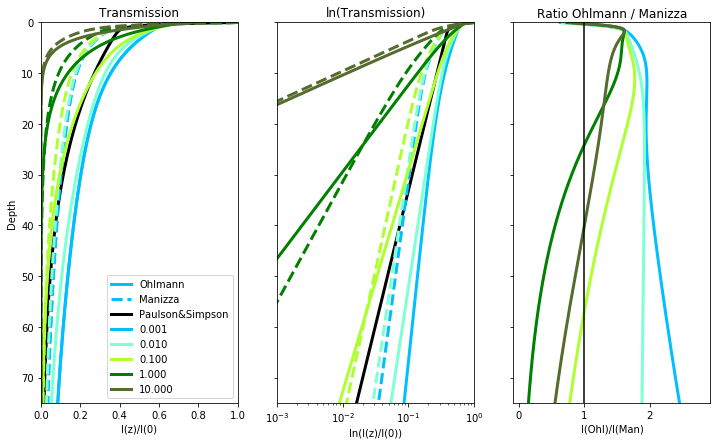

In [6]:
fig,ax = plt.subplots(ncols=3,sharey=True,figsize=(12,7))
(axl,axm,axr) = ax.flatten()
axl.plot(I_ohl[0,:],z,color=col[0],linewidth=3,label='Ohlmann')
axl.plot(I_man[0,:],z,color=col[0],linewidth=3,linestyle='dashed',label='Manizza')
axl.plot(I_ps,z,color='black',linewidth=3,label='Paulson&Simpson')
axm.semilogx(I_ps,z,color='black',linewidth=3)

for n,c in enumerate(chl):
    lab = '{:5.3f}'.format(c)
    axl.plot(I_ohl[n,:],z,color=col[n],linewidth=3,label=lab)
    axl.plot(I_man[n,:],z,color=col[n],linewidth=3,linestyle='dashed')

    axm.semilogx(I_ohl[n,:],z,color=col[n],linewidth=3,label=lab)
    axm.semilogx(I_man[n,:],z,color=col[n],linewidth=3,linestyle='dashed')

    axr.plot(I_ohl[n,:]/I_man[n,:],z,linewidth=3,color=col[n])
    
axl.set_ylim(75,0)
axl.set_xlim(0,1)
axl.set_ylabel('Depth')
axl.set_xlabel('I(z)/I(0)')
axl.set_title('Transmission')

axm.set_xlim(0.001,1)

axm.set_xlabel('ln(I(z)/I(0))')
axm.set_title('ln(Transmission)')


axr.set_title('Ratio Ohlmann / Manizza')
axr.set_xlabel('I(Ohl)/I(Man)')
axr.axvline(1.0,color='k')
axl.legend()

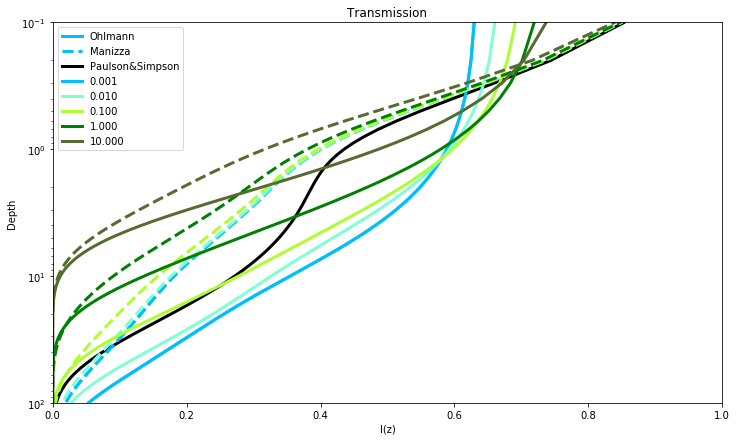

In [7]:
fig,axl = plt.subplots(figsize=(12,7))

axl.semilogy(I_ohl[0,:],z,color=col[0],linewidth=3,label='Ohlmann')
axl.semilogy(I_man[0,:],z,color=col[0],linewidth=3,linestyle='dashed',label='Manizza')
axl.semilogy(I_ps,z,color='black',linewidth=3,label='Paulson&Simpson')

for n,c in enumerate(chl):
    lab = '{:5.3f}'.format(c)
    axl.semilogy(I_ohl[n,:],z,color=col[n],linewidth=3,label=lab)
    axl.semilogy(I_man[n,:],z,color=col[n],linewidth=3,linestyle='dashed')

    
axl.set_ylim(100.,1e-1)
axl.set_xlim(0,1)
axl.set_ylabel('Depth')
axl.set_xlabel('I(z)')
axl.set_title('Transmission')
axl.legend()